# Importing libraries and reading dataset:

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_excel(r"C:\Users\LENOVO\OneDrive\Desktop\Coustomer Segmentation.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
data.shape

(541909, 8)

In [16]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


***The above function helped us to determine that there are null values in the data set. But we will fill them ones we select the features of our interest and consized the dataset*** 

In [18]:
data.describe(include='all')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23508\1336221646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


***From the above function we can say that the data is analysed for 38 different countries, with the maximum data belonging to the United Kingdom. Most of the sale was on 31st October 2011 and the product with stock code 85123A (White Hanging Heart-Light Holder) was most popular amongst the customers.*** 

# Data Exploration and Visualisation:

***As the data set has almost 5 lakhs entry the algorithm is not able to form the clusters properly giving less silhouette_score. So taking sample of the dataset***

In [172]:
sampled_data = data.sample(10000, random_state=42)
sampled_data.shape

(10000, 8)

In [173]:
import datetime

sampled_data["InvoiceDate"] = sampled_data["InvoiceDate"].dt.date
sampled_data["TotalSum"] = sampled_data["Quantity"] * sampled_data["UnitPrice"]

# The feature quantity and unit price could be clubbed together to calculate total price. These two columns together can give us more information and clubbing the features will reduce the time complexity of the model.

In [174]:
sampled_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01,0.85,17315.0,United Kingdom,20.40
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27,6.95,14031.0,United Kingdom,27.80
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21,0.65,14031.0,United Kingdom,2.60
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16,1.95,17198.0,United Kingdom,5.85
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10,9.95,13502.0,United Kingdom,19.90


***As of now from the feature Invoice date we are unable to extract some readable information so applying a function to calculate how recently the customer has visisted. Also, it is quite possible that the same customer has visited the store more than ones so grouping the data as per their Customer ID. After grouping the data as per the Custome ID if count the number of Invoices (from InvoiceNo feature) for that particular customer we can count the frequency of that customer.***

In [175]:
snapshot_date = max(sampled_data.InvoiceDate) + datetime.timedelta(days=1)
customers = sampled_data.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                            'InvoiceNo': 'count','TotalSum': 'sum'})

In [176]:
customers.head()

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12347.0,3,5,81.60
12349.0,19,1,19.90
12353.0,205,1,39.80
12354.0,233,2,25.45
12356.0,326,1,50.00


In [177]:
sampled_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01,0.85,17315.0,United Kingdom,20.40
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27,6.95,14031.0,United Kingdom,27.80
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21,0.65,14031.0,United Kingdom,2.60
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16,1.95,17198.0,United Kingdom,5.85
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10,9.95,13502.0,United Kingdom,19.90


***Now we have extracted information of our interest from the features InvoiceNo. Quantity, InvoiceDate, UnitPrice. So we can neglect these features. Also, I feel that the features StockCode, Description, Country will not be very relavent while clustering the customers. Keeeping in mind this, renaming the columns and creating a new data set by the name Customers.***  

In [178]:
customers.rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency','TotalSum': 'Expenditure'}, inplace=True)
customers.head()

,Recency,Frequency,Expenditure
CustomerID,,,
12347.0,3,5,81.60
12349.0,19,1,19.90
12353.0,205,1,39.80
12354.0,233,2,25.45
12356.0,326,1,50.00


In [179]:
customers.shape

(2433, 3)

In [180]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2433 entries, 12347.0 to 18287.0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      2433 non-null   int64  
 1   Frequency    2433 non-null   int64  
 2   Expenditure  2433 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 76.0 KB


***No null values so no need to fill the data***

In [181]:
customers.describe()

,Recency,Frequency,Expenditure
count,2433.000000,2433.000000,2433.000000
mean,115.114673,3.076038,60.757185
std,105.746852,5.693838,205.094177
min,1.000000,1.000000,-1867.860000
25%,30.000000,1.000000,12.400000
50%,73.000000,2.000000,24.770000
75%,191.000000,3.000000,53.100000
max,374.000000,137.000000,4887.330000


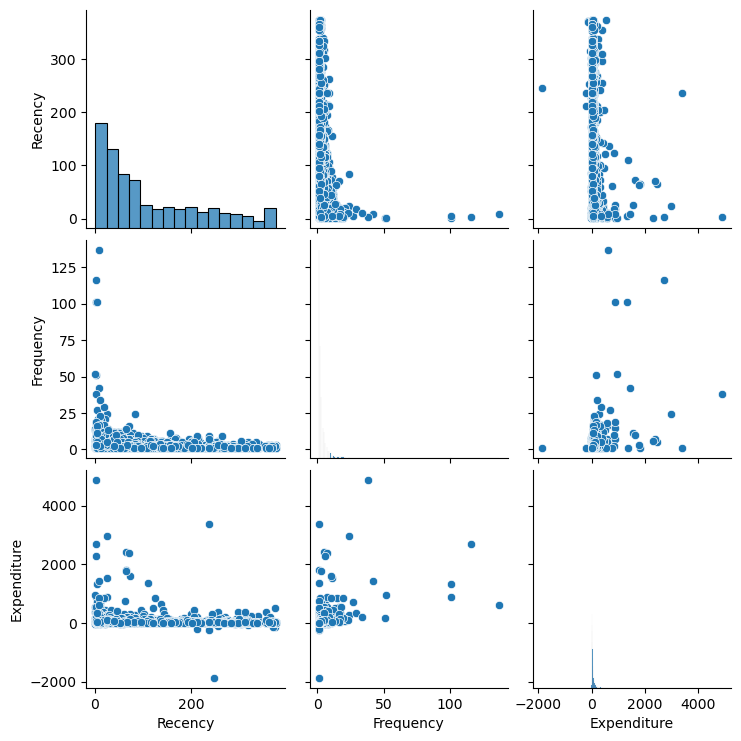

In [182]:
sns.pairplot(customers);

***The above pair plot is giving us a general bivariate analysis of the features helping us to understand the general relation between them. To explore the data further let us visualise each feature separately below.***

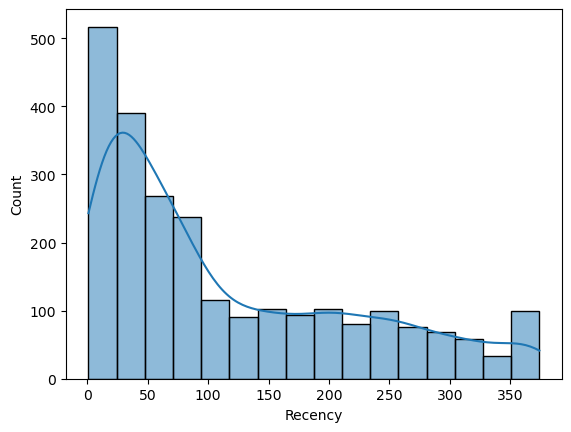

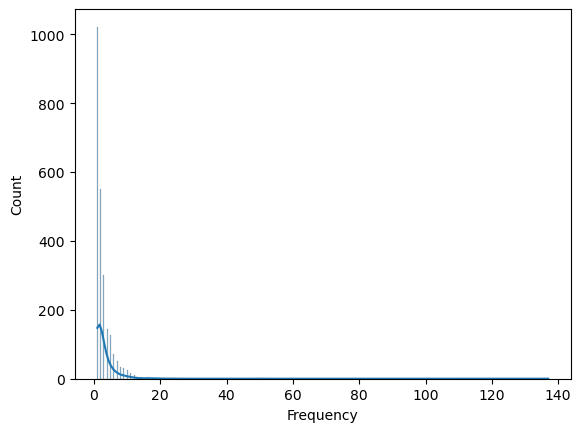

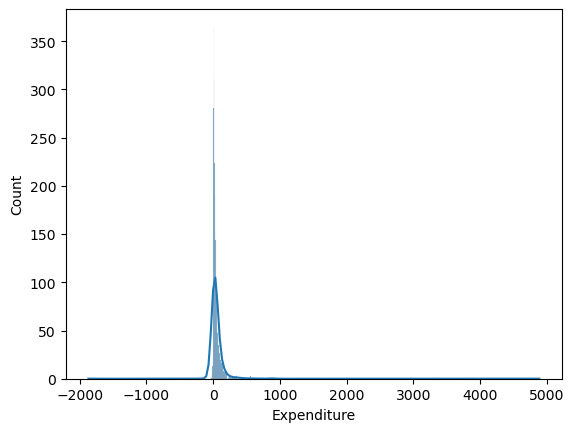

In [183]:
i=1
for var in customers:
    plt.figure(i)
    sns.histplot(data = customers, x=var, kde=True )
    plt.show()
    i = i+1

***From the above histograms we can say that the Expenditure is almost symeetric feature but there is skewness in other two features and so we will need to transform the data.***

# Data preprocessing:

In [184]:
#Noramlising the data

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
customers = pd.DataFrame(std.fit_transform(customers), columns=customers.columns)
customers.head()

,Recency,Frequency,Expenditure
0,-1.060436,0.337972,0.101646
1,-0.909100,-0.364686,-0.199253
2,0.850179,-0.364686,-0.102204
3,1.115017,-0.189022,-0.172186
4,1.994657,-0.364686,-0.052461


In [185]:
#Using Transformation technique

from sklearn.preprocessing import PowerTransformer

PT=PowerTransformer(method='yeo-johnson')
PT.fit_transform(customers[['Recency']])
PT.fit_transform(customers[['Frequency']])

array([[ 1.32608578],
       [-1.00109782],
       [-1.00109782],
       ...,
       [ 0.65579562],
       [ 1.9047845 ],
       [-1.00109782]])

In [186]:
customers.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of        Recency  Frequency  Expenditure
0    -1.060436   0.337972     0.101646
1    -0.909100  -0.364686    -0.199253
2     0.850179  -0.364686    -0.102204
3     1.115017  -0.189022    -0.172186
4     1.994657  -0.364686    -0.052461
...        ...        ...          ...
2428 -0.842890   0.337972     0.263947
2429 -0.719930  -0.189022     0.037760
2430 -1.060436  -0.013357    -0.041732
2431 -1.050977   1.391959    -0.162872
2432  0.821804  -0.364686    -0.221686

[2433 rows x 3 columns]>

# Predective model:

In [247]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,50):
  k1=KMeans(n_clusters=i)
  k1.fit(customers)
  wcss.append(k1.inertia_)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

In [248]:
len(wcss)

49

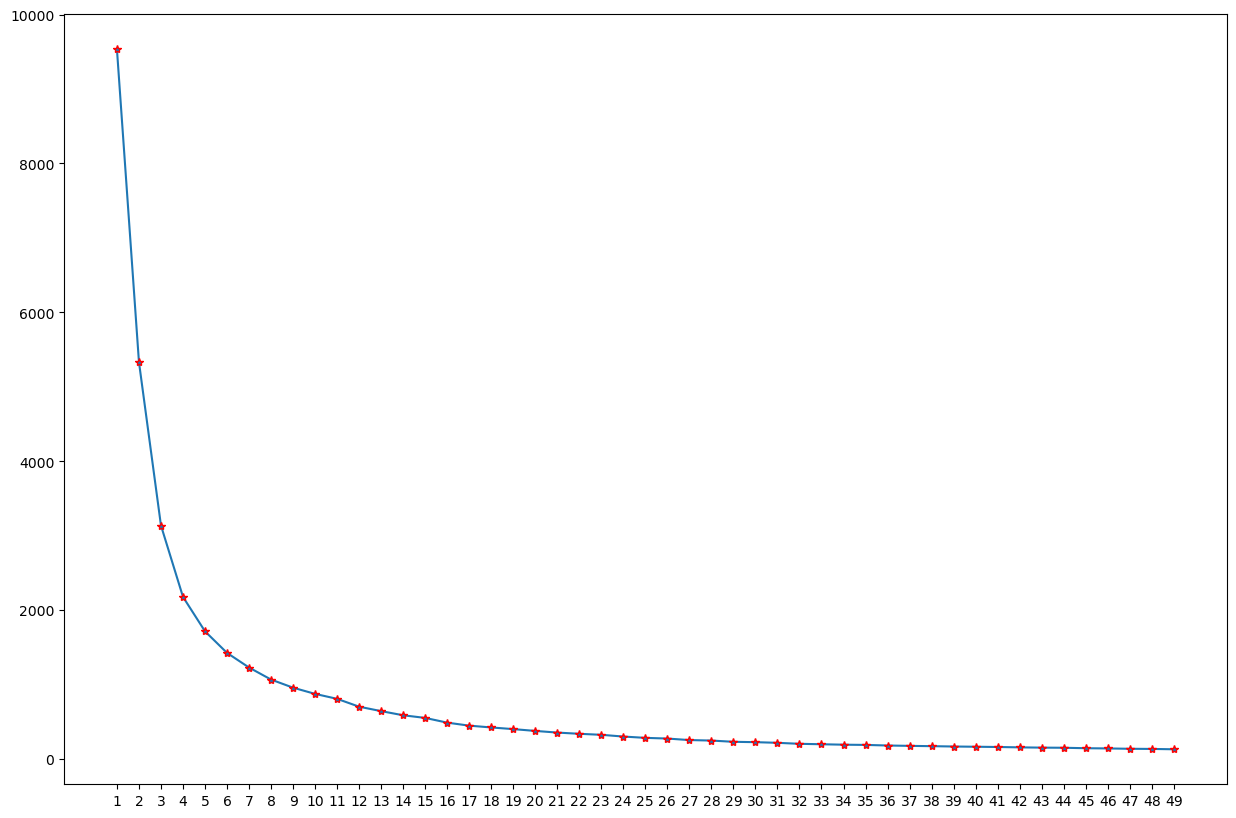

In [249]:
plt.figure(figsize=(15,10))
plt.plot(range(1,50),wcss,marker='*',mec='r')
plt.xticks(range(1,50,1))
plt.show()

In [250]:
k2=KMeans(n_clusters=4)
k2.fit(customers)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [251]:
k2.labels_

array([1, 1, 0, ..., 1, 1, 0])

In [252]:
labels=k2.fit_predict(customers)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


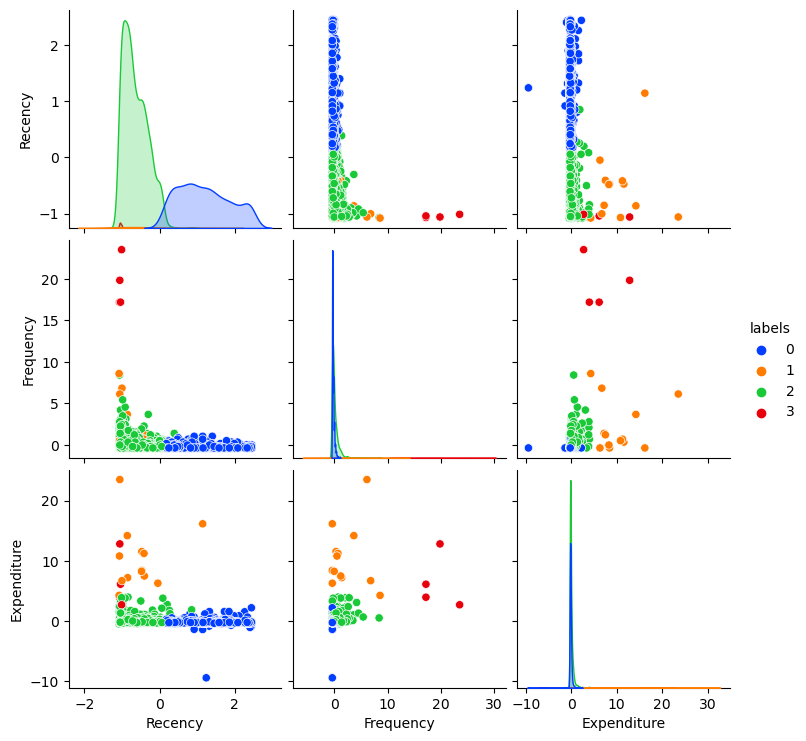

In [253]:
customers['labels']=labels

sns.pairplot(customers,hue='labels',palette='bright');

In [254]:
from sklearn.metrics import silhouette_score

silhouette_score(customers,labels)

0.6939604703447616

***Hirerchal Clustering:***

In [256]:
from sklearn.cluster import AgglomerativeClustering

Agc=AgglomerativeClustering(4)

In [257]:
Agc.fit(customers)

AgglomerativeClustering(n_clusters=4)

In [258]:
Agc.labels_

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [259]:
silhouette_score(customers,Agc.labels_)

0.6920190229675008